In [1]:
import sys
sys.path.append("/Users/martina/Desktop/BayesianOptimization-implement-kg")
from bayes_opt1 import BayesianOptimization
from bayes_opt1 import UtilityFunction
from plot_gp_function import plot_gp
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

from scipy.stats import norm
from scipy.optimize import minimize

# Comparative analysis on acquisition functions

In [2]:
x = np.linspace(-10, 10, 50).reshape(-1,1)

def target(x):
    return np.sin(x-3)/(x-3)

optimizer = BayesianOptimization(target, {'x': (min(x), max(x))}, random_state=27)

|   iter    |  target   |     x     |
-------------------------------------
|  1        | -0.2172   | -1.486    |
|  2        | -0.04542  |  6.292    |
1


/Users/martina/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


2
3
4
5
6
7
8
9
10
50


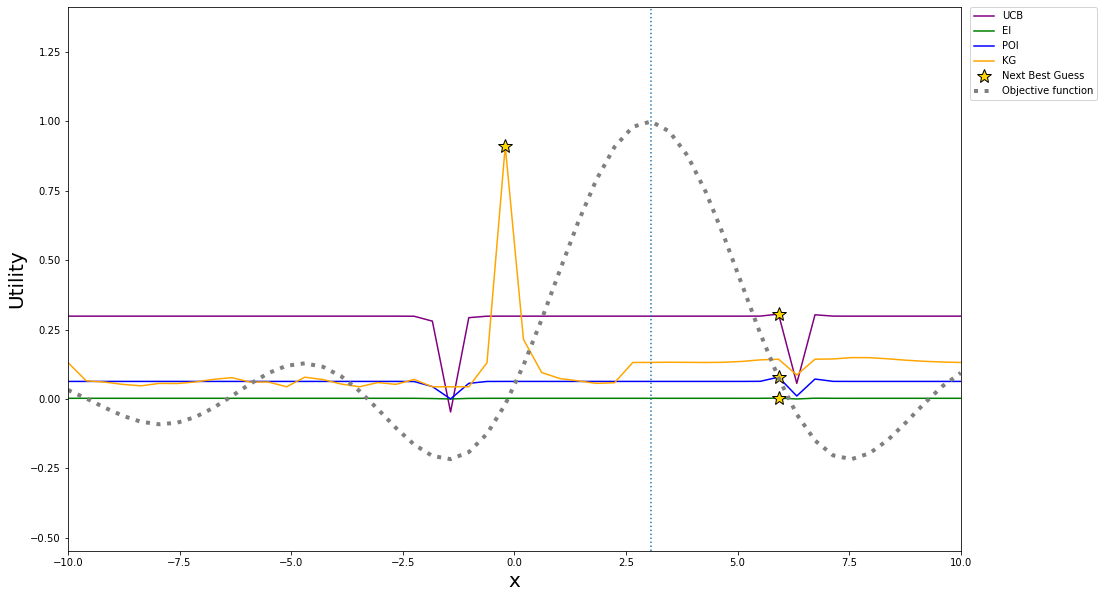

In [3]:
optimizer.maximize(init_points=2, n_iter=0, kappa=5)
plot_gp(optimizer, x, target)

|   iter    |  target   |     x     |
-------------------------------------
|  3        | -0.2166   | -1.419    |
|  4        |  0.09386  |  10.0     |
|  5        |  0.03232  | -10.0     |
|  6        | -0.06209  | -7.103    |
|  7        | -0.07673  |  8.82     |
1
2
3
4
5
6
7
8
9
10
50


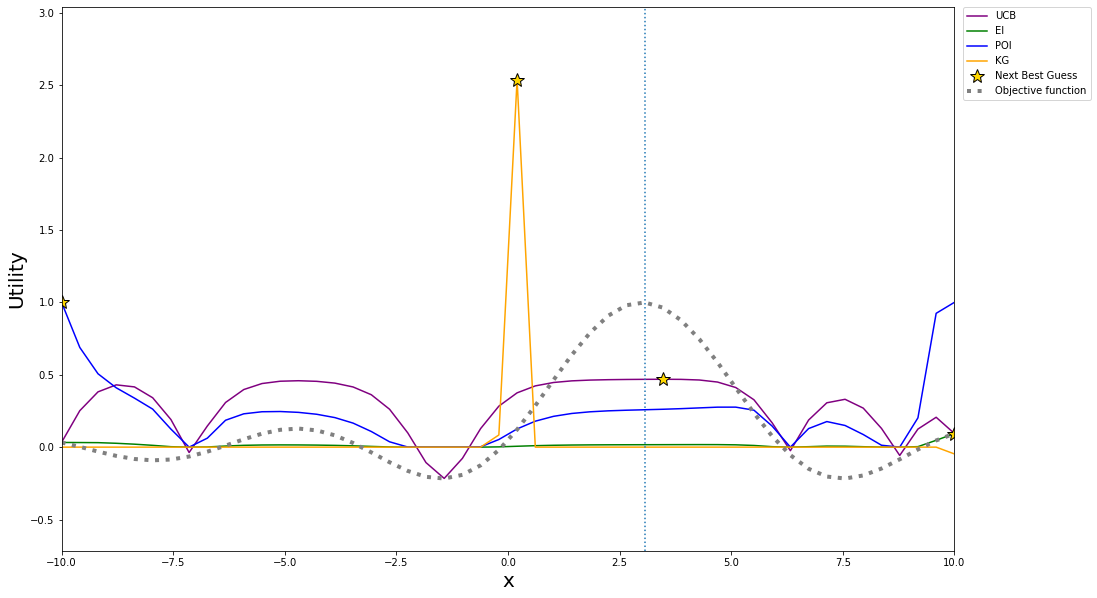

In [4]:
optimizer.maximize(init_points=0, n_iter=5, kappa=5)
plot_gp(optimizer, x, target)

|   iter    |  target   |     x     |
-------------------------------------
|  8        |  0.9589   |  3.499    |
|  9        |  0.8167   |  1.92     |
|  10       |  0.1274   | -4.604    |
|  11       |  0.9922   |  2.783    |
|  12       |  0.9978   |  3.115    |
1
2
3
4
5
6
7
8
9
10
50


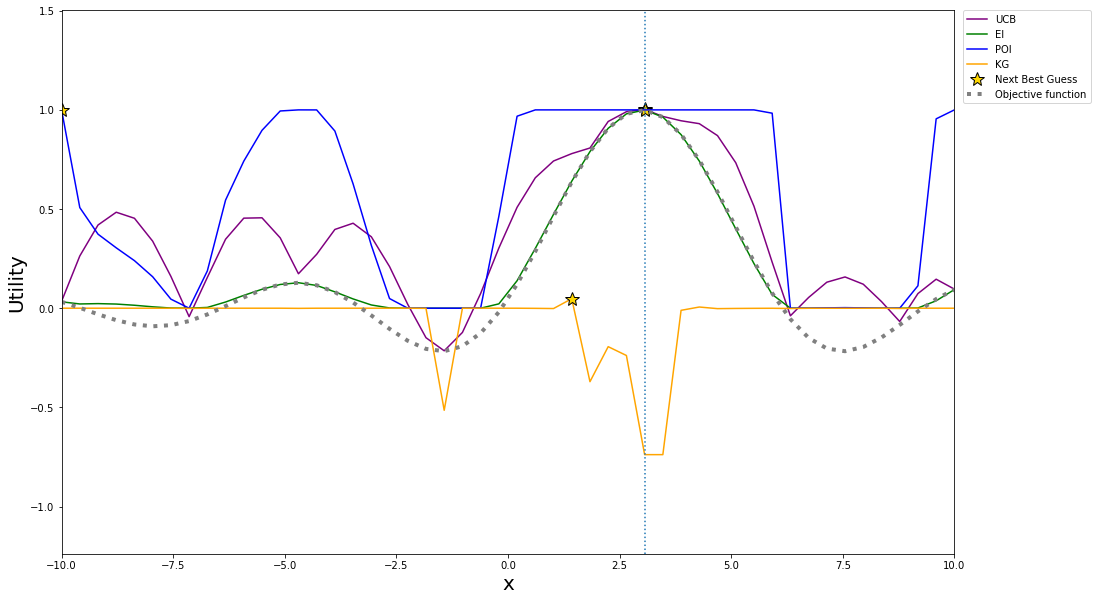

In [5]:
optimizer.maximize(init_points=0, n_iter=5, kappa=5)
plot_gp(optimizer, x, target)